## Imports

In [80]:
# Create a data set ....
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastai


def model_summary(net) :
    #print(net.children)
    header = "{:<30}{:<30}{:<20}".format("Layer" ,"Weight Size", "#Params")
    print(header)
    print("="*70)
    tp = 0
    for (ln,i) in net.named_parameters() :
        #print(ln, i.size(),np.prod(np.asarray(i.size())))
        trainable_params = np.prod(np.asarray(i.size()))
        ln_out = "{:<30}{:<30}{:<20}".format(ln , str(i.size()), trainable_params)
        print(ln_out)
        tp += trainable_params
    print("="*70)
    print("Total params: {}".format(tp))

## Create a Synthetic DataSet

In [127]:
NP=1000
# Create a sample time series
ii=np.linspace(0,100,num=NP)
a = np.sin(ii)
b = np.random.choice([0,1],size=NP,p=[0.05,0.95])


In [82]:
print(np.pi/2)
np.sin(0)
np.sin(3.14)

1.5707963267948966


0.0015926529164868282

In [128]:
#np.sin(a)
c = np.zeros(NP)
idx=0
for i in range(NP) :
    c[i] = a[idx]
    if(b[i]==0):
        idx=0
    idx+=1
c_prev = np.zeros(NP)
c_prev[1:NP] = c[0:NP-1]

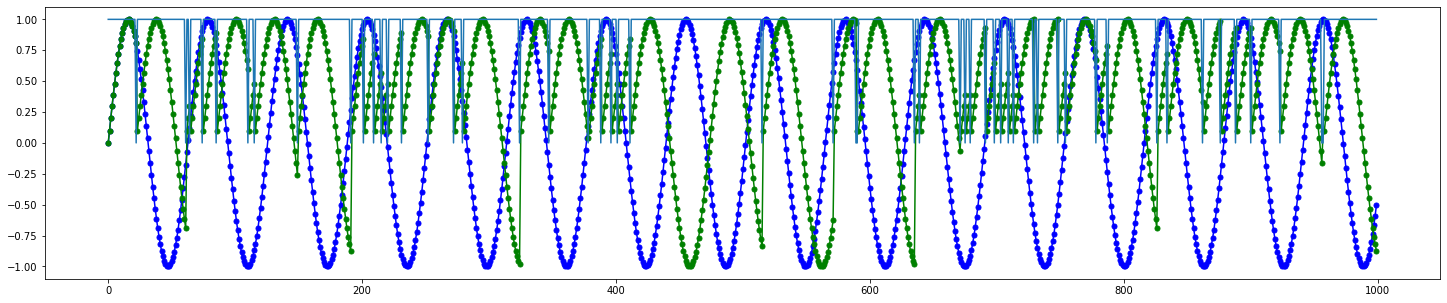

In [129]:
# C is just a sine wave ...
# resets when b equals zero
plt.figure(figsize=(25,5))
display(plt.plot(a,'-bo',markersize=5))
display(plt.plot(c,'-go',markersize=5))
display(plt.plot(b))


In [85]:
### Chuck it in a DF

In [130]:
df=pd.DataFrame(np.stack([ii,a,b,c_prev,c]).T, columns=['ii','a','b','c_prev','c'])
df.head(64) # 2*pi 6.28

,ii,a,b,c_prev,c
0,0.000000,0.000000,1.0,0.000000,0.000000
1,0.100100,0.099933,1.0,0.000000,0.099933
2,0.200200,0.198866,1.0,0.099933,0.198866
3,0.300300,0.295807,1.0,0.198866,0.295807
4,0.400400,0.389787,1.0,0.295807,0.389787
...,...,...,...,...,...
59,5.905906,-0.368393,1.0,-0.445749,-0.532974
60,6.006006,-0.273644,1.0,-0.532974,-0.614862
61,6.106106,-0.176155,0.0,-0.614862,-0.690595
62,6.206206,-0.076903,1.0,-0.690595,0.099933


In [ ]:
### Datablock API
# https://docs.fast.ai/data_block.html

## Build a fastai databunch from np array

In [ ]:
from fastai.data_block import FloatList

In [ ]:
# Sample code, not used ...

# split_by_idxs
#  ok, so here split__by_idxs requires 2 collections of indexes ..
# train_idxs = range(0,10)
# val_idxs = range(20,25)
# db1 = FloatList(items=X,ignore_empty=True).\
#      split_by_idxs(train_idx=train_idxs, valid_idx=val_idxs) # .label_from_func(get_float_labels, label_cls=FloatList)

## Databunch.add
# .add(FloatList(items=X))  , add extra data here ...

In [ ]:
# ItemList class has all the goodies and methods implemented.  Look there for code examples
tv_split=range(700,1000)
X=list(zip(a,b))
y=c
# Using Datablocks API
db = FloatList(items=X).split_by_idx(tv_split)._label_from_list(y, label_cls=FloatList)


In [ ]:
#db = FloatList(items=[a,b])
db.train.get(1)
print(db) # .num_parts
mdb = db.databunch()

In [ ]:
mdb.show_batch()

## RNN Example1 - not used .. come back to it

In [ ]:
## Build an RNN

#  import torch.nn as nn
#  
#  n_letters =10
#  n_hidden=5
#  n_categories=3
#  
#  class RNN(nn.Module):
#      def __init__(self, input_size, hidden_size, output_size, tx):
#          super(RNN, self).__init__()
#  
#          self.hidden_size = hidden_size
#  
#          self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
#          self.i2o = nn.Linear(input_size + hidden_size, output_size)
#          self.tx = tx
#          self.softmax = nn.LogSoftmax(dim=1)
#  
#      def forward(self, input, hidden):
#          for i in range(tx) :
#              combined = torch.cat((input[i], hidden), 1)
#              hidden = self.i2h(combined)
#              output = self.i2o(combined)
#              output = self.softmax(output)
#          return output, hidden
#  
#      def initHidden(self):
#          return torch.zeros(1, self.hidden_size)
#  
#  bptt=10
#  rnn = RNN(n_letters, n_hidden, n_categories)
#  h=rnn.initHidden()
#  for i in range(bptt) :
#      o, h = rnn(X)
#  


## RNN example 2 using pytorch RNN library

In [87]:
from torch.nn.init import xavier_normal_ , uniform_
# Initialize with Xavier normal distribuition        
def weights_xavier(m):
    if isinstance(m, nn.Conv2d):
        xavier_normal_(m.weight.data)
    elif isinstance(m, nn.Linear) :
        xavier_normal_(m.weight.data)
        m.bias.data.fill_(0)
    elif isinstance(m, nn.RNN) :
        xavier_normal_(m.weight_ih_l0.data)
        xavier_normal_(m.weight_hh_l0.data)
        m.bias_ih_l0.data.fill_(0)
        m.bias_hh_l0.data.fill_(0)

### Generic RNN Code Sample

In [88]:
# # initialize the hidden state.
rnn_model = nn.RNN(num_features, hidden_size, num_layers)  # Input dim is 3, output dim is 3
final_layer = nn.Linear(hidden_size,1)

rnn_model.apply(weights_xavier)

hidden_rnn = torch.randn(num_layers, batch_size, hidden_size)
inputs = torch.randn(Tx,batch_size,num_features)

print(inputs.size())
print(hidden_rnn.size())
out, hidden = rnn_model(inputs, hidden_rnn)
o = out[Tx-1].view(-1)
final_layer(o)

torch.Size([200, 1, 2])
torch.Size([1, 1, 10])


tensor([-0.3441], grad_fn=<AddBackward0>)

### Instantiate DVRNN

In [134]:
# https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html
# https://pytorch.org/docs/stable/_modules/torch/nn/modules/rnn.html

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

num_features = 2 # aka input_size, aka number of columns in X
Tx = 200          # sequence length 
hidden_size = 10  # number of features of hidden state
num_layers  = 1  # this is for stacked implementations.  Keep 1 for now
batch_size = 1


class DVRNN(nn.Module) :
    def __init__(self,nf,tx,hs,nl) :
        super(DVRNN,self).__init__()
        self.name = "DVRNN"
        self.tx=tx
        self.num_features=nf
        self.hidden_size=hs
        self.rnn = nn.RNN(num_features, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x, h):
        
        out1, hidden = self.rnn(x, h)
        out2 = out1[self.tx-1].view(-1)
        out3 = self.fc(out2)
        return out3,hidden
    
    # reset all parameters of model 
    def init_params(self) :
        self.apply(weights_xavier)

class DVLSTM(nn.Module) :
    def __init__(self,nf,tx,hs,nl) :
        super(DVLSTM,self).__init__()
        self.name = "DVLSTM"
        self.tx=tx
        self.num_features=nf
        self.hidden_size=hs
        self.lstm = nn.LSTM(num_features, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x, h):
        
        out1, hidden = self.lstm(x, h)
        out2 = out1[self.tx-1].view(-1)
        out3 = self.fc(out2)
        return out3,hidden
    
    # reset all parameters of model 
    def init_params(self) :
        self.apply(weights_xavier)

        
    

#list(rnn_model.named_parameters())
# Test ...
dvrnn = DVRNN(num_features,Tx,hidden_size,num_layers)
dvrnn.init_params()
print(model_summary(dvrnn))

dvlstm = DVLSTM(num_features,Tx,hidden_size,num_layers)
dvlstm.init_params()
model_summary(dvlstm)
#rnn_model.weight_ih_l0.data
# inputs = [torch.randn(1, num_features) for _ in range(100)]  # make a sequence of length num_features
# 
# 

# 
# #Reshape inputs .  List of 100 1x2 elements to 100 x 1 x 2 ...
# print(inputs[0].size())
# inputs = torch.cat(inputs).view(len(inputs), 1, -1)
# print(inputs.size())
# 
#print("Output  size : {}".format(out.size()))
#print("Hidden (out)  size : {}".format(hidden.size()))

# print(out)
# print(hidden)

Layer                         Weight Size                   #Params             
rnn.weight_ih_l0              torch.Size([10, 2])           20                  
rnn.weight_hh_l0              torch.Size([10, 10])          100                 
rnn.bias_ih_l0                torch.Size([10])              10                  
rnn.bias_hh_l0                torch.Size([10])              10                  
fc.weight                     torch.Size([1, 10])           10                  
fc.bias                       torch.Size([1])               1                   
Total params: 151
None
Layer                         Weight Size                   #Params             
lstm.weight_ih_l0             torch.Size([40, 2])           80                  
lstm.weight_hh_l0             torch.Size([40, 10])          400                 
lstm.bias_ih_l0               torch.Size([40])              40                  
lstm.bias_hh_l0               torch.Size([40])              40                  
fc.we

## Train RNN

In [135]:
# Build X, y
# Added in time lagged y (c_prev)
torch.manual_seed(0)

X  = torch.from_numpy(np.stack((a,b),axis=1)) #
X  = torch.unsqueeze(X,1).type(torch.FloatTensor)

print("X : {}".format(X.size()))
y = torch.from_numpy(c).type(torch.FloatTensor)
print("y : {} {}".format(type(y),y.size()))

#hidden_rnn = torch.randn(num_layers, batch_size, hidden_size)
hidden_rnn = torch.zeros(num_layers, batch_size, hidden_size)
hidden_lstm = (torch.zeros(num_layers, batch_size, hidden_size),torch.zeros(num_layers, batch_size, hidden_size))


X : torch.Size([1000, 1, 2])
y : <class 'torch.Tensor'> torch.Size([1000])


In [136]:
# Setup Custom RNN
dvrnn = DVRNN(num_features,Tx,hidden_size,num_layers)
dvrnn.init_params()

dvlstm = DVLSTM(num_features,Tx,hidden_size,num_layers)
dvlstm.init_params()

#dvrnn.train()
#optimizer = optim.SGD(dvrnn.parameters(), lr=0.1)
loss_function = nn.MSELoss()  # L1Loss


In [137]:
# Train
# 10 epoch @ 0.01
# 10 epoch @ 0.001
#optimizer = optim.Adam(dvrnn.parameters(), lr=0.005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
optimizer_rnn = optim.Adam(dvrnn.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
optimizer_lstm = optim.Adam(dvlstm.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

def train_instance(iteration, model, opt, hidden_init) :
    # Step 1. Remember that Pytorch accumulates gradients.
    # We need to clear them out before each instance
    dvrnn.zero_grad()
        
    # Build my X,y for the batch ...
    x_tx = X[iteration:iteration+Tx]
    y_tx = y[iteration+Tx].view(-1)
    #print(x_tx.size())
    #print(y_tx.size())
    #print(hidden_rnn.size())
    #print(y_tx)
    #print(x_tx)
    
    # Step 3. Run our forward pass.
    #print("hidden_rnn: {}".format(hidden_rnn))
    yhat, _ = model(x_tx, hidden_init)
    #print(hidden_rnn1.size())
    #print("yhat.size: {}".format(yhat.size()))

    # Step 4. Compute the loss, gradients, and update the parameters by
    #  calling optimizer.step()
    loss = loss_function(yhat, y_tx)
    #print("yhat:{} y_tx:{} loss:{}".format(yhat, y_tx, loss))
    loss.backward()
    opt.step()
    #print(list(dvrnn.parameters())[0].grad)
    return loss.item()

    
for epoch in range(5):  # again, normally you would NOT do 300 epochs, it is toy data
    epoch_rnn_loss=epoch_lstm_loss=0
    for i in range(NP-dvrnn.tx-1):#
        #print("Iteration: {} {}".format(epoch,i))
        epoch_rnn_loss += train_epoch(i,dvrnn,optimizer_rnn,hidden_rnn)
        epoch_lstm_loss += train_epoch(i,dvlstm,optimizer_lstm,hidden_lstm)
    print("Epoch loss: RNN {} LSTM {}".format(epoch_rnn_loss,epoch_lstm_loss))
    #print(dvrnn.rnn.weight_hh_l0.grad)
    #print(dvrnn.rnn.weight_hh_l0.data)
print(list(dvrnn.parameters()))

Epoch loss: RNN 241.2561661204302 LSTM 256.91395696126165
Epoch loss: RNN 228.92680862171815 LSTM 326.476744978492
Epoch loss: RNN 191.46102791394293 LSTM 264.3809744660549
Epoch loss: RNN 232.68747198472175 LSTM 291.8670793185688
Epoch loss: RNN 223.91251424407437 LSTM 260.9636082912781
[Parameter containing:
tensor([[ 0.1894, -0.2210],
        [-0.4814,  0.5190],
        [ 0.2921, -0.9398],
        [-0.2624,  0.0732],
        [-0.3840, -0.0401],
        [-0.3248, -0.5558],
        [ 0.5726, -0.2580],
        [ 0.4918, -0.0541],
        [-0.2149, -0.3342],
        [-0.5216,  0.6013]], requires_grad=True), Parameter containing:
tensor([[-0.0257,  0.1003, -0.2884,  0.0521, -0.6096, -0.3409,  0.0341,  0.0767,
         -0.0242,  0.1167],
        [-0.7040,  0.9915,  0.2226, -0.3225, -0.1346,  0.4975, -0.1477, -0.6095,
         -0.2541, -0.3698],
        [-0.6001,  0.4081, -0.1489,  0.2887,  0.0730,  0.2126,  0.4023, -0.0462,
         -0.2246,  0.3158],
        [ 0.5266, -0.2818, -0.0616, -

In [ ]:
# Add GRU
# Add Validation

i=192
for i in range(100,200):
    x_tx = X[i:i+dvrnn.tx]
    y[i+dvrnn.tx]
    yhat, _ = dvrnn(x_tx, hidden_rnn)
    print(yhat,y[i+dvrnn.tx],X[i+dvrnn.tx])

In [ ]:
list(dvrnn.parameters())[0]

In [ ]:
dvrnn.rnn.weight_hh_l0.grad

In [ ]:
# lstm ...
#lstm = nn.LSTM(3, 3)  # Input/Embedding dim is 3, output dim is 3, 
#hidden = (torch.randn(1, 1, 3),
#          torch.randn(1, 1, 3))


In [ ]:
rnn=nn.RNN(3,3)
inputs = [torch.randn(1, 3) for _ in range(5)]  # make a sequence of length 5
inputs

In [ ]:
# initialize the hidden state.
hidden = (torch.randn(1, 1, 3),
          torch.randn(1, 1, 3))
hidden

In [ ]:
print(inputs[0])
print(inputs[0].view(1,1,-1)) # just adds a dimension! unsqueeze

In [ ]:
#https://johaupt.github.io/python/fastai/pytorch/fastai_custom_network_module.html


In [ ]:
from fastai.basic_train import *
from fastai.metrics import *
learner = Learner(data=mdb, model=rnn, loss_func=nn.MSELoss()) # ,metrics=accuracy)


In [ ]:
#learner.lr_find()
learner.model

In [ ]:
doc(cnn_learner)